### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA = '../Data/fish.csv'

In [3]:
fishDF = pd.read_csv(DATA, usecols=[0,1,2])

In [4]:
fishDF.head(2)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3


In [5]:
# Bream과 Smelt 만 가져오기
mask = (fishDF.Species == 'Bream') | (fishDF.Species == 'Smelt')
twoDF = fishDF[mask]
twoDF.head(2)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3


In [6]:
# twoDF - index 재지정
twoDF.reset_index(drop=True, inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [7]:
# Species 컬럼을 수치화 => Bream: 0, Smelt: 1
twoDF['fishcode'] = twoDF.Species.replace({'Bream':0, 'Smelt':1})

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_17804\1182816986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['fishcode'] = twoDF.Species.replace({'Bream':0, 'Smelt':1})


In [9]:
twoDF.head(2), twoDF.tail(2)

(  Species  Weight  Length  fishcode
 0   Bream   242.0    25.4         0
 1   Bream   290.0    26.3         0,
    Species  Weight  Length  fishcode
 47   Smelt    19.7    14.3         1
 48   Smelt    19.9    15.0         1)

[2] 피쳐와 타겟 분리

In [10]:
# 피쳐: Weight, Length // 타겟: fishcode


features = twoDF[['Weight', 'Length']]
target = twoDF['fishcode']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [11]:
# 데이터셋 나누기 (학습용, 테스트용)
from sklearn.model_selection import train_test_split

In [12]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : *분류*일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
# random_state > random.seed 역할
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    train_size=0.8,
                                                    stratify=target,
                                                    random_state=10)

In [13]:
print(f'x_train: {x_train.shape}, {x_train.ndim}D')
print(f'y_train: {y_train.shape}, {y_train.ndim}D')

print(f'x_test: {x_test.shape}, {x_test.ndim}D')
print(f'y_test: {y_test.shape}, {y_test.ndim}D')

x_train: (39, 2), 2D
y_train: (39,), 1D
x_test: (10, 2), 2D
y_test: (10,), 1D


In [14]:
y_train.head()

7     0
43    1
1     0
46    1
31    0
Name: fishcode, dtype: int64

In [15]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()

fishcode
0    28
1    11
Name: count, dtype: int64

In [19]:
print(f'Bream(0) train 비율: {y_train.value_counts()[0]/y_train.shape[0]}\nSmelt(1) train 비율: {y_train.value_counts()[1]/y_train.shape[0]}')

Bream(0) train 비율: 0.717948717948718
Smelt(1) train 비율: 0.28205128205128205


In [20]:
print(f'Bream(0) test 비율: {y_test.value_counts()[0]/y_test.shape[0]}\nSmelt(1) test 비율: {y_test.value_counts()[1]/y_test.shape[0]}')

Bream(0) test 비율: 0.7
Smelt(1) test 비율: 0.3


[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [23]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
# 학습 후 모델 파라미터
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [25]:
model.score(x_test, y_test)

1.0

[6] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의사항 : 입력데이터 ==> 2D

In [26]:
# 임의의 데이터 생성 (2D)
check_data = pd.DataFrame([[414, 27.2]], columns=model.feature_names_in_)
check_data

,Weight,Length
0,414,27.2


In [27]:
model.predict(check_data)

array([0], dtype=int64)

In [28]:
# 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(check_data)

In [29]:
distance

array([[16.10093165, 24.1627813 , 36.08670115, 36.10872471, 51.03175482]])

In [30]:
index

array([[25,  0, 21,  6, 22]], dtype=int64)

In [31]:
neighbors = index.reshape(-1).tolist()

In [32]:
twoDF.loc[neighbors]

,Species,Weight,Length,fishcode
25,Bream,725.0,35.0,0
0,Bream,242.0,25.4,0
21,Bream,685.0,34.0,0
6,Bream,500.0,29.7,0
22,Bream,620.0,34.5,0


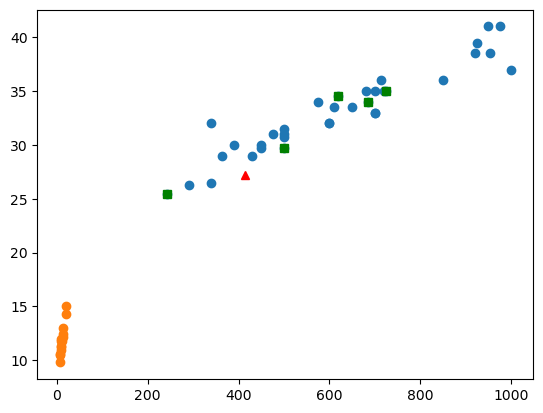

In [33]:
### 시각화로 확인

plt.scatter(twoDF.loc[:34, 'Weight'], twoDF.loc[:34, 'Length'])
plt.scatter(twoDF.loc[35:, 'Weight'], twoDF.loc[35:, 'Length'])
plt.plot(check_data['Weight'], check_data['Length'], 'r^')
plt.plot(twoDF.loc[neighbors]['Weight'], twoDF.loc[neighbors]['Length'], 'gs')
plt.show()